# CSS5228 Final Project

In this notebook, we will start training our model

- Random Forest Base - MAE: 331763.892261509

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

from efficient_apriori import apriori

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree
from sklearn.cluster import KMeans

In [2]:
df_train = pd.read_csv("../../clean_data/train_preproc.csv", index_col=0)
# df_test = pd.read_csv("../../clean_data/test_preproc.csv", index_col=0)

In [3]:
df_train

,property_type,built_year,num_beds,num_baths,size_sqft,total_num_units,lat,lng,subzone,planning_area,...,mean_property_sqft,mean_planning_sqft,planning_area_mean,total_rooms,size_per_room,mean_property_type,distance,num_shopping_malls,tenure_99-year leasehold,tenure_freehold
0,hdb,1988,3.0,2.0,1115,116,1.414399,103.837196,yishun south,yishun,...,1079.757868,1231.474343,1.143726e+06,5.0,223.00,6.620452e+05,0.573567,2.0,1,0
1,hdb,1992,4.0,2.0,1575,375,1.372597,103.875625,serangoon north,serangoon,...,1079.757868,2514.468039,3.670975e+06,6.0,262.50,6.620452e+05,1.728895,3.0,1,0
2,condo,2022,4.0,6.0,3070,56,1.298773,103.895798,mountbatten,marine parade,...,1154.798804,2011.903265,4.159877e+06,10.0,307.00,2.919816e+06,1.315256,5.0,0,1
3,condo,2023,3.0,2.0,958,638,1.312364,103.803271,farrer court,bukit timah,...,1154.798804,2468.346271,5.576084e+06,5.0,191.60,2.919816e+06,0.723885,4.0,0,1
4,condo,2026,2.0,1.0,732,351,1.273959,103.843635,anson,downtown core,...,1154.798804,1590.161473,4.853464e+06,3.0,244.00,2.919816e+06,0.370022,16.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20091,condo,2026,2.0,2.0,635,605,1.385938,103.834466,tagore,ang mo kio,...,1154.798804,1634.952055,2.355193e+06,4.0,158.75,2.919816e+06,0.150007,4.0,1,0
20092,condo,2026,2.0,2.0,883,137,1.315948,103.857589,lavender,kallang,...,1154.798804,1106.259542,2.256485e+06,4.0,220.75,2.919816e+06,0.442631,6.0,0,1
20093,condo,2023,4.0,4.0,1378,340,1.315961,103.836848,moulmein,novena,...,1154.798804,1662.211716,3.637860e+06,8.0,172.25,2.919816e+06,0.422131,5.0,0,1
20094,hdb,2017,3.0,2.0,1205,402,1.440753,103.806671,woodlands east,woodlands,...,1079.757868,1229.137405,8.223176e+05,5.0,241.00,6.620452e+05,0.632423,8.0,1,0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20096 entries, 0 to 20095
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   property_type             20096 non-null  object 
 1   built_year                20096 non-null  int64  
 2   num_beds                  20096 non-null  float64
 3   num_baths                 20096 non-null  float64
 4   size_sqft                 20096 non-null  int64  
 5   total_num_units           20096 non-null  int64  
 6   lat                       20096 non-null  float64
 7   lng                       20096 non-null  float64
 8   subzone                   20096 non-null  object 
 9   planning_area             20096 non-null  object 
 10  price                     20096 non-null  float64
 11  active_years              20096 non-null  int64  
 12  planning_area_density     20096 non-null  float64
 13  remaining_lease           20096 non-null  int64  
 14  mean_s

In [5]:
df_train.isnull().sum()

property_type               0
built_year                  0
num_beds                    0
num_baths                   0
size_sqft                   0
total_num_units             0
lat                         0
lng                         0
subzone                     0
planning_area               0
price                       0
active_years                0
planning_area_density       0
remaining_lease             0
mean_subzone_price          0
mean_subzone_sqft           0
mean_property_sqft          0
mean_planning_sqft          0
planning_area_mean          0
total_rooms                 0
size_per_room               0
mean_property_type          0
distance                    0
num_shopping_malls          0
tenure_99-year leasehold    0
tenure_freehold             0
dtype: int64

<AxesSubplot:>

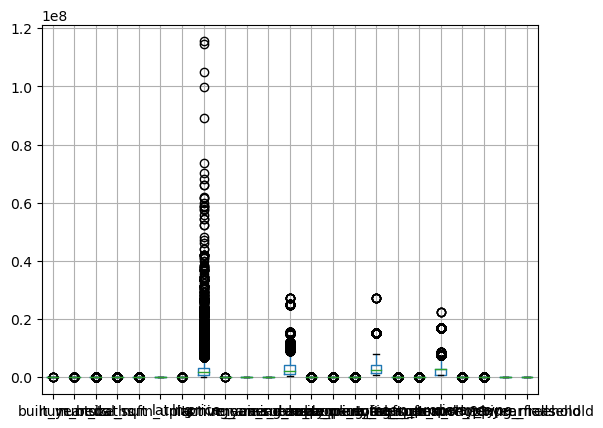

In [6]:
df_train.boxplot()

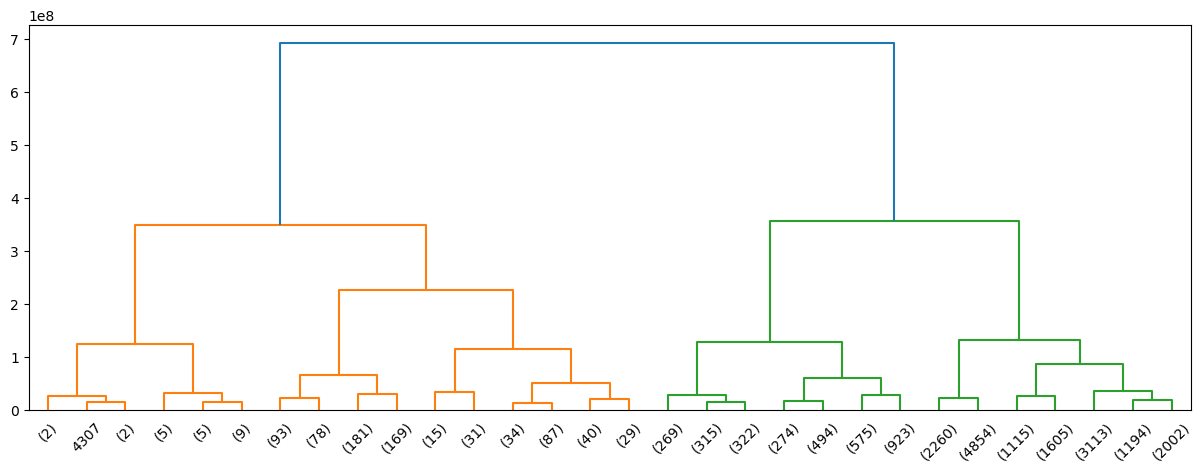

In [7]:
plt.figure(figsize=(15,5))
cls=df_train[['size_sqft','price']]
mergings=linkage(cls,method='ward',metric='euclidean')
dendrogram(mergings,truncate_mode='lastp')
plt.show()

In [8]:
cluster=cut_tree(mergings,n_clusters=4)

In [9]:
cluster_cut = pd.Series(cut_tree(mergings,n_clusters=4).reshape(-1))

In [10]:
cluster_cut.value_counts()

0    16143
1     3172
2      757
3       24
dtype: int64

In [11]:
d1 = df_train.copy()
d1['cluster']=cluster

In [12]:
# data_cluster['cluster']=cluster

In [13]:
plt.figure(figsize=(15,5))
sns.scatterplot(y=df_train.price,x=df_train['size_sqft'],hue=d1['cluster'],palette='deep')

<AxesSubplot:xlabel='size_sqft', ylabel='price'>

In [14]:
ssd = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,random_state=4)
    kmeans.fit(cls)
    ssd.append(kmeans.inertia_)

In [15]:
plt.plot(range(1,10),ssd,marker='*',color='b')

In [17]:
from sklearn.metrics import silhouette_score

score = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k,random_state=4)
    kmeans.fit(cls)
    labels = kmeans.labels_
    ss = silhouette_score(d1,labels)
    score.append(ss)

Text(0.5, 0, 'no of clusters')

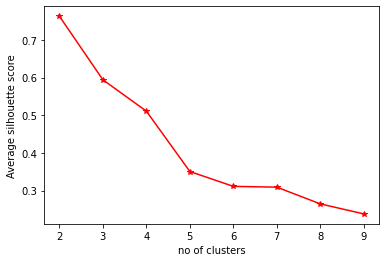

In [48]:
plt.plot(range(2,10),score,marker='*',color='r')
plt.ylabel('Average silhouette score')
plt.xlabel('no of clusters')

In [49]:
model=KMeans(n_clusters=3,random_state=10)
cluster_kmeans=model.fit_predict(d1)
d1['kmeans_cluster']=cluster_kmeans
d1.head()

,num_beds,num_baths,size_sqft,total_num_units,lat,lng,price,mean_tenure_price,active_years,remaining_lease,...,property_type_townhouse,property_type_walk-up,furnishing_fully,furnishing_na,furnishing_partial,furnishing_unfurnished,furnishing_unspecified,per_sqft,cluster,kmeans_cluster
0,3.0,2.0,1115,116.0,1.414399,103.837196,514500.0,1.887102e+06,34.0,65.0,...,0,0,0,0,0,0,1,461.434978,0,0
1,4.0,2.0,1575,-1.0,1.372597,103.875625,995400.0,1.887102e+06,30.0,69.0,...,0,0,0,0,0,0,1,632.000000,0,0
2,4.0,6.0,3070,56.0,1.298773,103.895798,8485000.0,4.723458e+06,0.0,-1.0,...,0,0,0,0,1,0,0,2763.843648,1,2
3,3.0,2.0,958,638.0,1.312364,103.803271,2626000.0,4.723458e+06,-1.0,-1.0,...,0,0,0,0,1,0,0,2741.127349,0,0
4,2.0,1.0,732,351.0,1.273959,103.843635,1764000.0,1.887102e+06,-4.0,103.0,...,0,0,0,0,0,0,1,2409.836066,0,0


In [52]:
d2 = d1.groupby(by='kmeans_cluster')
d2[['size_per_room','num_baths','num_beds','size_sqft','price']].mean()

,size_per_room,num_baths,num_beds,size_sqft,price
kmeans_cluster,,,,,
0,220.959997,2.176619,2.789649,1093.718036,1.640908e+06
1,733.946761,5.931694,5.644809,8435.909836,2.490357e+07
2,435.683494,4.784130,4.669369,4193.963311,7.832260e+06


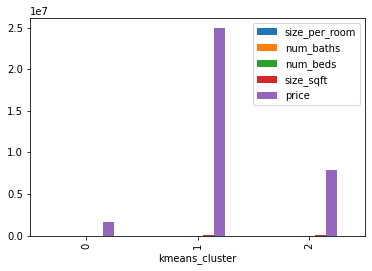

In [54]:
d2[['size_per_room','num_baths','num_beds','size_sqft','price']].mean().plot.bar()
plt.show()

In [55]:
def cluster_plot(data, nclusters):
    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt
    X = data.copy()
    cols = list(X.columns)
    km = KMeans(n_clusters=nclusters, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    y_km = km.fit_predict(X)


    # Visualize it:
    plt.figure(figsize=(8, 6))
    plt.scatter(X.iloc[:,0], X.iloc[:,1], c=km.labels_.astype(float))

    # plot the centroids
    plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', label='centroids')
    plt.xlabel(cols[0])
    plt.ylabel(cols[1])
    plt.legend(scatterpoints=1)
    plt.grid()
    plt.show()


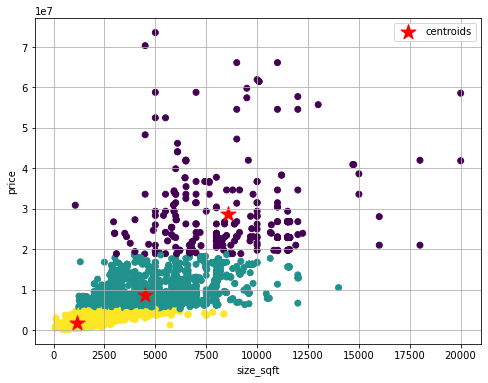

In [56]:
cluster_plot(cls,3)

DBSCAN

In [58]:
from sklearn.cluster import DBSCAN


In [59]:
dbscan = DBSCAN(eps=0.25,min_samples=4)

dbscan.fit(cls)

pd.Series(dbscan.labels_).value_counts()

-1      14625
 175       22
 10        21
 15        19
 56        18
        ...  
 282        4
 281        4
 277        4
 276        4
 513        4
Length: 515, dtype: int64

In [60]:
lbl = pd.Series(dbscan.labels_)
lbl.loc[lbl >= 0] = 0
lbl.value_counts()

-1    14625
 0     2789
dtype: int64

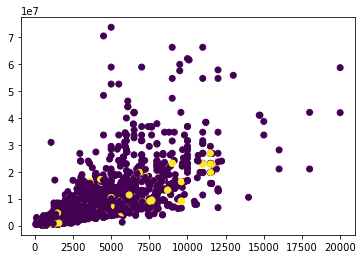

In [61]:
plt.scatter(cls['size_sqft'],cls['price'],c=lbl)

Principal Component Analysis(PCA)

In [62]:
from sklearn.decomposition import PCA

In [64]:

dtrain = df_train.copy()
pca=PCA()
pca.fit(dtrain)

print(np.cumsum(pca.explained_variance_ratio_*100))

[ 76.13838965  87.06397044  96.49509591  99.99999546  99.99999901
  99.99999973  99.99999999 100.         100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.         100.         100.        ]


In [65]:
pca=PCA(n_components=2)
pca.fit_transform(dtrain)

print(pca.explained_variance_ratio_*100)

[76.13838965 10.92558078]


In [66]:
components = pca.components_.T
pd.DataFrame(components,index=dtrain.columns,columns=['PC1','PC2'])

,PC1,PC2
num_beds,1.260064e-07,-6.076248e-08
num_baths,1.793572e-07,-7.095538e-08
size_sqft,2.705829e-04,-1.201620e-04
total_num_units,-6.868623e-06,3.510988e-06
lat,-2.760549e-09,-3.160133e-09
lng,-4.166632e-11,-2.110824e-09
price,8.141733e-01,4.655927e-01
mean_tenure_price,1.074989e-01,-1.102960e-01
active_years,-3.057153e-07,1.114239e-07
remaining_lease,-3.118392e-06,3.018467e-06


In [67]:
data_pca=pd.DataFrame(pca.transform(dtrain),columns=['PC1','PC2'])
data_pca

,PC1,PC2
0,-3.718885e+06,3.683082e+05
1,-2.710334e+06,1.338697e+06
2,4.902199e+06,2.648561e+06
3,5.252395e+05,3.964595e+05
4,-6.135191e+05,1.482160e+05
...,...,...
17409,1.042686e+07,2.176806e+06
17410,-1.810902e+06,-9.295502e+05
17411,-7.018195e+05,-8.083162e+05
17412,-3.602900e+06,3.838145e+05


In [68]:
model=KMeans(n_clusters=3,random_state=10)
cluster_kmeans=model.fit_predict(data_pca)
data_pca['km_cluster_pca']=cluster_kmeans

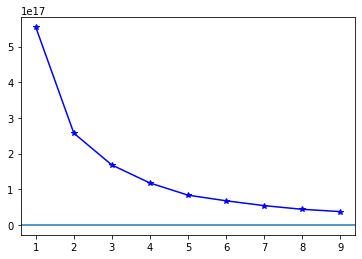

<Figure size 1080x360 with 0 Axes>

In [72]:
ssd = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,random_state=4)
    kmeans.fit(data_pca)
    ssd.append(kmeans.inertia_)

plt.plot(range(1,10),ssd,marker='*',color='b')
plt.axhline(15000)
plt.figure(figsize=(15,5))
plt.show()

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

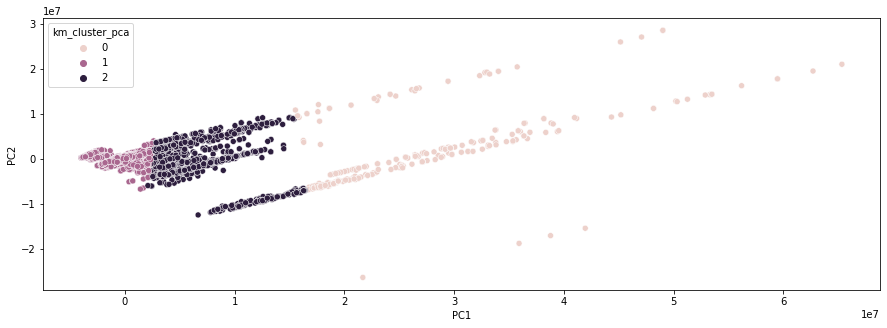

In [71]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=data_pca['PC1'],y=data_pca['PC2'],hue=data_pca['km_cluster_pca'])

Recommendation Systems

In [80]:
from sklearn.neighbors import NearestNeighbors

class Recommender:
    def __init__(self, X):
        self.X = X


    def feature_selection(self, feature_list):
        return self.X[feature_list]


    def train_model(self, model_input):
        nbrs = NearestNeighbors(n_neighbors=10, algorithm='ball_tree').fit(model_input)
        distances, indices = nbrs.kneighbors(model_input)
        return indices


    def find_house_recommendations(self, recommendations, visited_house_history, num_of_recom = 10):
        filtered_houses = recommendations[visited_house_history]
        return filtered_houses

In [90]:
X = pd.read_csv("../../clean_data/train_preproc.csv", index_col=0)

obj = Recommender(X)


model_input = obj.feature_selection(['size_per_room','num_baths','num_beds','size_sqft'])

recommendations = obj.train_model(model_input)


visited_house_history = [10536, 14794]
filtered_houses = recommendations[visited_house_history]

recom_indices = obj.find_house_recommendations(recommendations, visited_house_history = visited_house_history, num_of_recom = 10)

# house_recommend = []
for house in range(len(visited_house_history)):
    final_houses_to_recommend = X.iloc[recom_indices[house]]
    print(final_houses_to_recommend.shape)

# recom_indices 
X.iloc[recom_indices[0]]
# X.iloc[recom_indices[1]]


(10, 39)
(10, 39)


,num_beds,num_baths,size_sqft,total_num_units,lat,lng,price,mean_tenure_price,active_years,remaining_lease,...,property_type_landed,property_type_semi-detached house,property_type_terraced house,property_type_townhouse,property_type_walk-up,furnishing_fully,furnishing_na,furnishing_partial,furnishing_unfurnished,furnishing_unspecified
14794,3.0,2.0,1118,106.0,1.382643,103.743532,572200.0,1.887102e+06,29.0,70.0,...,0,0,0,0,0,0,0,0,0,1
10536,3.0,2.0,1118,-1.0,1.335292,103.770954,840000.0,1.887102e+06,33.0,66.0,...,0,0,0,0,0,0,0,0,0,1
7477,3.0,2.0,1118,-1.0,1.348228,103.941222,659400.0,1.887102e+06,34.0,65.0,...,0,0,0,0,0,0,0,0,0,1
819,3.0,2.0,1118,-1.0,1.332789,103.866578,682500.0,1.887102e+06,38.0,61.0,...,0,0,0,0,0,0,0,0,0,1
291,3.0,2.0,1119,95.0,1.343526,103.696193,513300.0,1.887102e+06,32.0,67.0,...,0,0,0,0,0,0,0,0,0,1
104,3.0,2.0,1119,-1.0,1.326164,103.902162,556500.0,1.887102e+06,36.0,63.0,...,0,0,0,0,0,0,0,0,0,1
15,3.0,2.0,1119,129.0,1.381630,103.742102,554400.0,1.887102e+06,30.0,69.0,...,0,0,0,0,0,0,0,0,0,1
51,3.0,2.0,1119,206.0,1.349949,103.949946,617400.0,1.887102e+06,38.0,61.0,...,0,0,0,0,0,0,0,0,0,1
154,3.0,2.0,1119,91.0,1.385089,103.740921,514500.0,1.887102e+06,29.0,70.0,...,0,0,0,0,0,1,0,0,0,0
209,3.0,2.0,1119,58.0,1.316431,103.857532,2324700.0,4.723458e+06,-1.0,-1.0,...,0,0,0,0,0,0,0,0,1,0


In [89]:
X.iloc[recom_indices[1]]


,num_beds,num_baths,size_sqft,total_num_units,lat,lng,price,mean_tenure_price,active_years,remaining_lease,...,property_type_landed,property_type_semi-detached house,property_type_terraced house,property_type_townhouse,property_type_walk-up,furnishing_fully,furnishing_na,furnishing_partial,furnishing_unfurnished,furnishing_unspecified
14794,3.0,2.0,1118,106.0,1.382643,103.743532,572200.0,1.887102e+06,29.0,70.0,...,0,0,0,0,0,0,0,0,0,1
10536,3.0,2.0,1118,-1.0,1.335292,103.770954,840000.0,1.887102e+06,33.0,66.0,...,0,0,0,0,0,0,0,0,0,1
7477,3.0,2.0,1118,-1.0,1.348228,103.941222,659400.0,1.887102e+06,34.0,65.0,...,0,0,0,0,0,0,0,0,0,1
819,3.0,2.0,1118,-1.0,1.332789,103.866578,682500.0,1.887102e+06,38.0,61.0,...,0,0,0,0,0,0,0,0,0,1
291,3.0,2.0,1119,95.0,1.343526,103.696193,513300.0,1.887102e+06,32.0,67.0,...,0,0,0,0,0,0,0,0,0,1
104,3.0,2.0,1119,-1.0,1.326164,103.902162,556500.0,1.887102e+06,36.0,63.0,...,0,0,0,0,0,0,0,0,0,1
15,3.0,2.0,1119,129.0,1.381630,103.742102,554400.0,1.887102e+06,30.0,69.0,...,0,0,0,0,0,0,0,0,0,1
51,3.0,2.0,1119,206.0,1.349949,103.949946,617400.0,1.887102e+06,38.0,61.0,...,0,0,0,0,0,0,0,0,0,1
154,3.0,2.0,1119,91.0,1.385089,103.740921,514500.0,1.887102e+06,29.0,70.0,...,0,0,0,0,0,1,0,0,0,0
209,3.0,2.0,1119,58.0,1.316431,103.857532,2324700.0,4.723458e+06,-1.0,-1.0,...,0,0,0,0,0,0,0,0,1,0
